In [2]:
# !pip3 install transformers
# !pip3 install datasets

In [3]:
from datasets import load_dataset, list_datasets

/usr/local/lib/python3.6/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
type(list_datasets)

function

In [5]:
all_datasets = list_datasets()
print("The number of Avaliable datasets and it can be increased as based on datasets version: ", len(all_datasets))
all_datasets[:10]

The number of Avaliable datasets and it can be increased as based on datasets version:  4651


['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews']

In [6]:
# lets use emotion dataset
# it takes a time to load the dataset for first time, then it use the cassed version next time you run the code
emtions = load_dataset('emotion')

Using custom data configuration default


Dataset emotion downloaded and prepared to /home/qblocks/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 1234.22it/s]


In [7]:
type(emtions)

datasets.dataset_dict.DatasetDict

In [8]:
emtions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
# looks like dictionary So !
train_data = emtions['train']
print(type(train_data))
train_data

<class 'datasets.arrow_dataset.Dataset'>


Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

# Dataset Object

This class of **Dataset** one of the strong data structure in the dataset library, its like python list, so we can access using indexed way. 
This **Dataset** data structure based on Appache arrow which defines type of column format than more memory effient than python code.

In [10]:
print(type(train_data[:3]))

train_data[:3]

<class 'dict'>


{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [11]:
# if we just interested in just the labels
train_data['label'][:3]

[0, 0, 3]

In [12]:
train_data.column_names # as like data frame get the different columns in the data

['text', 'label']

In [13]:
# As saw above this Dataset object has features key and it hold information about each col datatype
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

# load_dataset

Its not only about the dataset available on Huggin hub, its about other data either on your machine of anywhere, it also can handle different types of the dataset like csv and other.

The load_dataset use the corresponding  script file for your datafile to load it.

**Lets get emotion dataset from its source**

In [14]:
data_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {data_url}

--2022-05-07 09:07:58--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6028:18::a27d:4712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2022-05-07 09:07:58--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c9ae58fda19fe8dc683853962.dl.dropboxusercontent.com/cd/0/inline/BkyF8WZBq7Zexgmr2CX0QddZfEkNWJ5Kyxgi6S6yjn-5s2jPBZ-89BtUXCyhaJglGetXSD7LObus8kwnPNw6PJ9gVBcIV_pT7qtkSF1xvX-MePzhGKduv1e5F_8_sHQnMcEbIGgXPPbxO2-ynZbmrE1G4KOiSmL_egLAf-6i8DjWjA/file# [following]
--2022-05-07 09:07:58--  https://uc0c9ae58fda19fe8dc683853962.dl.dropboxusercontent.com/cd/0/inline/BkyF8WZBq7Zexgmr2CX0QddZfEkNWJ5Kyxgi6S6yjn-5s2jPBZ-89BtUXCyhaJglGetXSD7LOb

In [15]:
!pwd train.txt

/home/qblocks/nlp_with_transformers/chapter_2


In [16]:
!head -5 train.txt

i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love
i am feeling grouchy;anger


# lets load that file into dataset

In [20]:
emtions_from_source = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])
emtions_from_source

Using custom data configuration default-d6781a817a656443
Reusing dataset csv (/home/qblocks/.cache/huggingface/datasets/csv/default-d6781a817a656443/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 678.36it/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [21]:
# point the files to the url directly
emtions_from_source = load_dataset("csv", data_files=data_url, sep=";", names=["text", "label"])
emtions_from_source

Using custom data configuration default-3923f2a50ece047b
Reusing dataset csv (/home/qblocks/.cache/huggingface/datasets/csv/default-3923f2a50ece047b/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 653.32it/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 333
    })
})

# From Datasets to DataFrames

In [22]:
emtions.set_format('pandas')
type(emtions)

datasets.dataset_dict.DatasetDict

In [23]:
df = emtions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [24]:
print(emtions['train'].features['label'])
# lets get the class of label
emtions['train'].features['label'].int2str(4)

ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)


'fear'

In [25]:
def label_int2str(row):
    return emtions['train'].features['label'].int2str(row)
df['label_name'] = df['label'].apply(label_int2str)

In [26]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Looking at the Class Distribution

In [27]:
import matplotlib.pyplot as plt

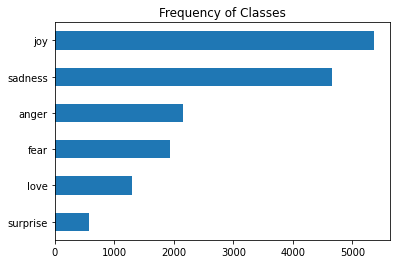

In [28]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [29]:
df['words_per_tweet'] = df['text'].str.split().apply(len)
df.head()

,text,label,label_name,words_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


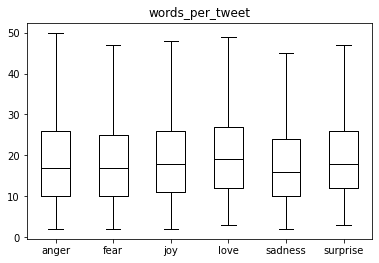

In [30]:
df.boxplot("words_per_tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [31]:
emtions.reset_format()
df.head()

,text,label,label_name,words_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [32]:
emtions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

# From Text to Tokens
Transformers models are expected to receive numerical vector that represent the whole text, and for that we first tokenize that text into tokens, then from these tokens get the numerical representation:

Their are different tokenization strategies either:

- Character Tokenization, represent string as list of chars
- word Tokenization, represent string as list of words
- 



In [33]:
# Character Tokenization
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

# Map chars into numbers
print("="*50)
token2idx = {ch: val for val, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

# Encode chars into numbers
print("="*50)
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}
[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [34]:
import torch
import torch.nn.functional as F

In [35]:
input_ids = F.torch.tensor(input_ids)
input_ids

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])

In [36]:
# convert the input ids into one hot matrix
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
print(one_hot_encodings.shape)
print("="*50)
print(len(input_ids))
print("="*50)
print(len(token2idx))
# For each of the 38 input tokens we now have a one-hot vector with 20 dimensions
# this operation help avoid consider input_ids as numbers like 5, 14 to detected as pattern
one_hot_encodings[:2]

torch.Size([38, 20])
38
20


tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [37]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
# we can see the index of 5 is 1
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# Word Tokenization

One of the ways to tokenize text is to get the words of that text into list.
But the language are free grammer, free of errors and so on, so we can expect large number of words, may be millions and even more in large dataset.
But the challange is that when we tend to compress these millions of different words into 300 dimension, and this cause the netwrok to have layers with billions of parameters !

So instead of lossing some information by ignoring some words and take only first 10000 common words or larger of smaller than that numbers, we can use another way which is "Subword Tokenization", using this approach we can have all the information and do not mission some words.

# Subword Tokenization
The basic idea behind subword tokenization is to combine the best aspects of character and word tokenization.

The main distinguishing feature of subword tokenization (as well as word tokenization) is that it is learned from the pretraining corpus using a mix of statistical rules and algorithms.

In [38]:
from transformers import AutoTokenizer

In [39]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 20.6kB/s]
Downloading: 100%|██████████| 483/483 [00:00<00:00, 443kB/s]
Downloading: 100%|██████████| 226k/226k [00:00<00:00, 722kB/s] 
Downloading: 100%|██████████| 455k/455k [00:00<00:00, 726kB/s]  


In [40]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [41]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


# Note !

- [CLS] and [SEP], these two tokens define the start and end of the sequence.
- Tokens are in lower case, this ensure that there are some preprocessing in that tokenizer
- Since NLP and Tokenization are not language words, so it tokenized to sub-tokens, and ## means that the preceding string is not whitespace.



In [42]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [43]:
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)

# this is means the model except the input_ids and attention_mask
print(tokenizer.model_input_names)

30522
512
['input_ids', 'attention_mask']


# Tokenizing the Whole Dataset

In [44]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [45]:
print(tokenize(emtions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


# Notes !

in input ids:

- 100 for UNK (unkown words)
- 101 = [CLS] token
- 102 = [SEP] token
- 103 = masked words
- 0 for padding

in attention_mask:
- 0 for absence words, in meet of 0 in input ids
- 1 for existing words

The attention mask helo the model to ignore the padding of the input_ids, so it have 0 in meet of these 0 in input ids.


In [46]:
# batch_size =None, will process the different parts of dataset as one batch like train, test, validation
emtions_encoded = emtions.map(tokenize, batched=True, batch_size=None)
emtions_encoded

100%|██████████| 1/1 [00:00<00:00, 15.75ba/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [47]:
emtions_encoded['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [48]:
emtions['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

# Note !

The map function added two new columns which the input_ids and attention_mask related to each tweet

# Training a Text Classifier

we need to combine pretrained body with a custom classification head, because most of these models are language models, that trying to predict the masked word.

## Two ways !

There are two ways of using these language models, either by using the hidden states tha represent the text as it, and use it for features engineering or fine tune these states via training the model end to end with our dataset.


In [49]:
from transformers import AutoModel

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else  "cpu")
print(device)
model = AutoModel.from_pretrained(model_ckpt).to(device)

cuda


Downloading: 100%|██████████| 256M/256M [00:02<00:00, 105MB/s]  
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Note !
This is torch model but if we need to change to tensorflow, just put TF before AutoModel.
so either model in torch or tensorflow we can easily convery between them.

But we need to change the paramter from_pt=True, when call TFAutoModel.from_pretrained(), the vise verse change 
from_tf=True when call AutoModel.from_pretrained(), this is in case we need to load different model in other framework like load toch model into tensorflow

# Extracting the last hidden states

In [51]:
text = "this is a test"
# directly return the tensors in torch
inputs = tokenizer(text, return_tensors='pt')
print(inputs)
print(inputs.input_ids.shape)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
torch.Size([1, 6])


In [52]:
# load to gpu if available
inputs = {k:v.to(device) for k, v in inputs.items()}
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}


In [53]:
# To know what the model need
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [54]:
# no_grad disable the automatic graident calculation
with torch.no_grad():
    outputs = model(**inputs)

In [55]:
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1564, -0.1862,  0.0527,  ..., -0.1188,  0.0663,  0.5469],
         [-0.3570, -0.6484, -0.0618,  ..., -0.3037,  0.3507,  0.5219],
         [-0.2767, -0.4461,  0.1818,  ..., -0.0948, -0.0078,  0.9956],
         [-0.2835, -0.3919,  0.3749,  ..., -0.2149, -0.1170,  1.0524],
         [ 0.2663, -0.5093, -0.3182,  ..., -0.4204,  0.0144, -0.2151],
         [ 0.9444,  0.0111, -0.4720,  ...,  0.1440, -0.7283, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [56]:
# The 6 tokens encoding above converted to 1 for batch size * 6 * 768 for each token which is the token embedding !
print(outputs['last_hidden_state'].shape)

torch.Size([1, 6, 768])


# Using first token 

For classification tasks, it is common practice to just use the hidden state associated with the [CLS] token as the input feature. Since this token appears at the start of each sequence, we can extract it by simply indexing into outputs.last_hidden_state as follows:

In [57]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [58]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state[:, 0]
    # cpu().numpy() because the map method except python or numpy object
    return {"last_hidden_state": last_hidden_state.cpu().numpy()}

In [59]:
# because the model except tensors
emtions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
print(emtions_encoded['train'].column_names)
emtions_encoded

['text', 'label', 'input_ids', 'attention_mask']


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [60]:
emotions_hidden = emtions_encoded.map(extract_hidden_states, batched=True, batch_size=64)

100%|██████████| 32/32 [00:01<00:00, 27.88ba/s]


In [61]:
print(emtions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# Note !
Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them. To do that, we’ll need a feature matrix—let’s take a look.

# Creating a feature matrix


In [62]:
import numpy as np

In [63]:
X_train = np.array(emotions_hidden["train"]["last_hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["last_hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(X_train.shape, X_valid.shape)

(16000, 768) (2000, 768)


# Visualizing the training set

In [64]:
# it takes time

In [65]:
# from umap import UMAP
# from sklearn.preprocessing import MinMaxScaler

# # Scale features to [0,1] range
# X_scaled = MinMaxScaler().fit_transform(X_train)
# # Initialize and fit UMAP
# mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# # Create a DataFrame of 2D embeddings
# df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
# df_emb["label"] = y_train
# df_emb.head()

In [66]:
# fig, axes = plt.subplots(2, 3, figsize=(7,5))
# axes = axes.flatten()
# cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
# labels = emotions["train"].features["label"].names

# for i, (label, cmap) in enumerate(zip(labels, cmaps)):
#     df_emb_sub = df_emb.query(f"label == {i}")
#     axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
#                    gridsize=20, linewidths=(0,))
#     axes[i].set_title(label)
#     axes[i].set_xticks([]), axes[i].set_yticks([])
    
# plt.tight_layobut()
# plt.show()

# Note !

From this plot we can see some clear patterns: the negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions. On the other hand, joy and love are well separated from the negative emotions and also share a similar space.

We may have hoped for some separation, this is in no way guaranteed since the model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in texts.

In [68]:
# !pip3 install sklearn

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [70]:
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=100)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

/home/qblocks/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6055

In [72]:
labels = emotions_hidden["train"].features["label"].names

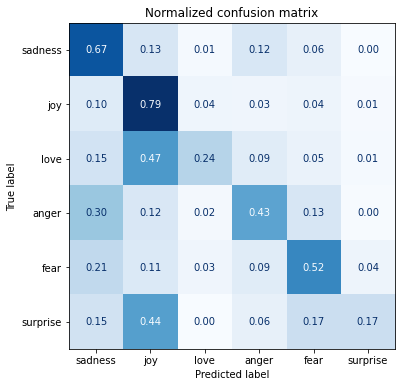

In [73]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# Fine-Tuning Transformers

Instead of using the AutoModel we will use another one that has the head layer of classifcation and pass to it the number of classes we have.

In [74]:
from transformers import AutoModelForSequenceClassification

In [75]:
num_labels = 6

model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classi

In [76]:
from sklearn.metrics import accuracy_score, f1_score

In [77]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [80]:
# !pip3 install ipywidgets

In [81]:
from huggingface_hub import notebook_login

notebook_login()

In [82]:
from transformers import Trainer, TrainingArguments

In [83]:
batch_size = 64

In [84]:
batch_size = 64

logging_steps = len(emtions_encoded["train"]) // batch_size

model_name = f"{model_ckpt}-finetuned-emotion"

training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [85]:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emtions_encoded["train"],
                  eval_dataset=emtions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Cloning https://huggingface.co/Abdelrahman-Rezk/distilbert-base-uncased-finetuned-emotion into local empty directory.
/home/qblocks/.local/lib/python3.6/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.557441,0.822000,0.795600
2,0.748300,0.366291,0.888500,0.881885


/usr/local/lib/python3.6/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=250, training_loss=0.7483097534179688, metrics={'train_runtime': 59.671, 'train_samples_per_second': 536.274, 'train_steps_per_second': 4.19, 'total_flos': 720342861696000.0, 'train_loss': 0.7483097534179688, 'epoch': 2.0})

In [87]:
preds_output = trainer.predict(emtions_encoded["validation"])
preds_output.metrics

/usr/local/lib/python3.6/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'test_loss': 0.366291344165802,
 'test_accuracy': 0.8885,
 'test_f1': 0.8818845305609924,
 'test_runtime': 1.4033,
 'test_samples_per_second': 1425.229,
 'test_steps_per_second': 11.402}

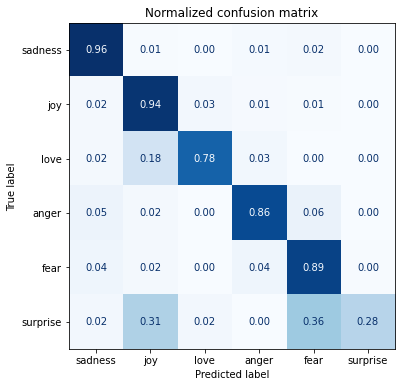

In [88]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

# Error Analysis

In [89]:
from torch.nn.functional import cross_entropy

In [90]:
def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [91]:
# Convert our dataset back to PyTorch tensors
emtions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emtions_encoded["validation"] = emtions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

100%|██████████| 125/125 [00:01<00:00, 115.53ba/s]


In [93]:
emtions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emtions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [94]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.855570
1963,i called myself pro life and voted for perry w...,joy,sadness,4.808292
1950,i as representative of everything thats wrong ...,surprise,sadness,4.773470
1801,i feel that he was being overshadowed by the s...,love,sadness,4.575978
882,i feel badly about reneging on my commitment t...,love,sadness,4.560463
1274,i am going to several holiday parties and i ca...,joy,sadness,4.373714
765,i feel super awkward and out of place right now,joy,sadness,4.286697
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.198670
1964,i feel vaguely cheated and a little amused,joy,anger,4.081535
1662,i did not directly react to the spot fixing co...,joy,anger,3.995224


In [95]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
69,i have no extra money im worried all of the ti...,sadness,sadness,0.037551
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.038526
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.039481
1601,i feel so ungrateful when thinking saying thes...,sadness,sadness,0.039486
1303,i feel pathetic and uninspired,sadness,sadness,0.039545
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.039777
1663,i feel idiotic calling again though,sadness,sadness,0.039832
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.040096
34,i feel that i m so pathetic and downright dumb...,sadness,sadness,0.040236
1502,i feel ungrateful for stupid shit like,sadness,sadness,0.040342


In [96]:
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]
Upload file pytorch_model.bin:  95%|█████████▌| 244M/255M [00:38<00:00, 20.0MB/s] remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Abdelrahman-Rezk/distilbert-base-uncased-finetuned-emotion
   06c5686..d762f80  main -> main

Upload file pytorch_model.bin: 100%|██████████| 255M/255M [00:40<00:00, 6.67MB/s]

Upload file training_args.bin: 100%|██████████| 2.98k/2.98k [00:40<?, ?B/s]
Upload file training_args.bin: 100%|██████████| 2.98k/2.98k [00:40<?, ?B/s]
remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Abdelrahman-Rezk/distilbert-base-uncased-finetuned-emotion
   d762f80..4b7e30f  main -> main



'https://huggingface.co/Abdelrahman-Rezk/distilbert-base-uncased-finetuned-emotion/commit/d762f80220de1102ae7047c8820720de47ad6efb'

In [97]:
from transformers import pipeline

In [98]:
model_id = "Abdelrahman-Rezk/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

Downloading: 100%|██████████| 883/883 [00:00<00:00, 720kB/s]
Downloading: 100%|██████████| 255M/255M [00:07<00:00, 36.2MB/s] 
Downloading: 100%|██████████| 333/333 [00:00<00:00, 364kB/s]
Downloading: 100%|██████████| 226k/226k [00:00<00:00, 548kB/s]  
Downloading: 100%|██████████| 695k/695k [00:00<00:00, 1.26MB/s] 
Downloading: 100%|██████████| 112/112 [00:00<00:00, 108kB/s]


In [99]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.009261421859264374},
  {'label': 'LABEL_1', 'score': 0.936631441116333},
  {'label': 'LABEL_2', 'score': 0.02277613990008831},
  {'label': 'LABEL_3', 'score': 0.009772058576345444},
  {'label': 'LABEL_4', 'score': 0.007020071614533663},
  {'label': 'LABEL_5', 'score': 0.014538859017193317}]]

In [101]:
import pandas as pd

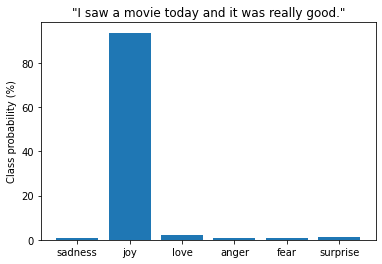

In [102]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()